<a href="https://colab.research.google.com/github/yogeshjadhav1997/machine-learning-Project/blob/main/Health_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required packages

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load DataSet

In [142]:
data=pd.read_csv(r'/content/insurance.csv')

In [143]:
#Display Top 5 Rows of the Dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [144]:
#Display Bottom 5 Rows of the Dataset
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [145]:
#Shape of Dataset

data.shape

(1338, 7)

# Information about DataSet

In [146]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Get Statistics about Dataset

In [147]:


data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Check the NUll Values 

In [148]:

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [149]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Convert object datatype columns values string to numerical values 

In [150]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [151]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [152]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [153]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [154]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# Split Data

In [155]:
X=data.drop(['expenses'],axis=1)
y=data['expenses']

print("shape of X : ",X.shape)
print("shape of y : ",y.shape)

shape of X :  (1338, 6)
shape of y :  (1338,)


# train test split Data

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

print("shape of X_train : ",X_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of y_train : ",y_train.shape)
print("shape of y_test : ",y_test.shape)

shape of X_train :  (1070, 6)
shape of X_test :  (268, 6)
shape of y_train :  (1070,)
shape of y_test :  (268,)


# Import Models

In [157]:
from sklearn.linear_model import LinearRegression             #Linear Regression 
from sklearn.svm import SVR                                   #Support Vector Machines Regression
from sklearn.ensemble import RandomForestRegressor            #Random Forest Regression
from sklearn.ensemble import GradientBoostingRegressor        #Gradient Boosting Regression

# Model Training 

In [158]:
lr=LinearRegression()              #Linear Regression 
lr.fit(X_train,y_train)

LinearRegression()

In [159]:
svr=SVR()                        #Support Vector Machines Regression
svr.fit(X_train,y_train)

SVR()

In [160]:
rf=RandomForestRegressor()       #Random Forest Regression
rf.fit(X_train,y_train)

RandomForestRegressor()

In [161]:
gbr=GradientBoostingRegressor()   #Gradient Boosting Regression
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [162]:
y_pred1=lr.predict(X_test)
y_pred2=svr.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gbr.predict(X_test)

In [163]:
df=pd.DataFrame({"Actual":y_test,'LR':y_pred1,'SVM':y_pred2,'RF':y_pred3,'GBR':y_pred4})

In [164]:
df

,Actual,LR,SVM,RF,GBR
151,7789.64,9392.741367,9438.198595,13209.7184,9669.460364
1146,52590.83,36644.306373,9507.205713,45754.7691,45064.902754
1305,2464.62,3055.892523,9293.942900,11691.8397,4674.303780
392,8964.06,11223.436034,9438.950760,13563.7776,10953.097910
123,39556.49,33959.490045,9411.848927,39905.4120,40213.808836
...,...,...,...,...,...
209,6610.11,12338.017786,9388.857598,10508.6422,8936.171266
1250,18648.42,28030.364463,9294.697149,26997.0949,20007.156422
503,32548.34,26169.052745,9279.792808,33903.8441,34593.261806
668,45710.21,38067.891886,9515.270313,46191.2803,45293.926502


# Compare Parformance Visually

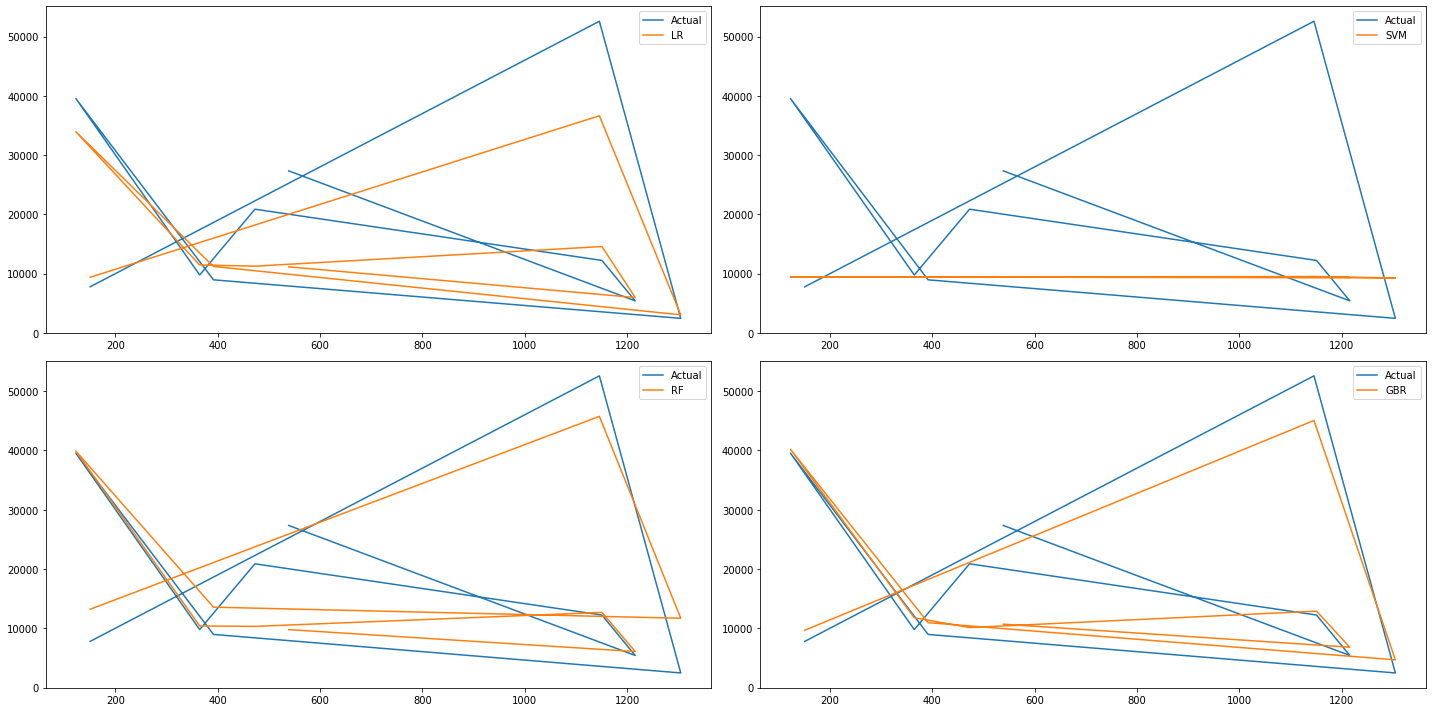

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(221) 
plt.plot(df['Actual'].iloc[0:10],label='Actual')
plt.plot(df['LR'].iloc[0:10],label='LR')
plt.legend()

plt.subplot(222) 
plt.plot(df['Actual'].iloc[0:10],label='Actual')
plt.plot(df['SVM'].iloc[0:10],label='SVM')
plt.legend()

plt.subplot(223) 
plt.plot(df['Actual'].iloc[0:10],label='Actual')
plt.plot(df['RF'].iloc[0:10],label='RF')
plt.legend()

plt.subplot(224) 
plt.plot(df['Actual'].iloc[0:10],label='Actual')
plt.plot(df['GBR'].iloc[0:10],label='GBR')
plt.legend()


plt.tight_layout()




# Evalauating the Algorithm

In [166]:
from sklearn import metrics

In [167]:
#r2_score
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [168]:
print("Model 1 :",score1,"\nModel 2 :",score2,"\nModel 3 :",score3,"\nModel 4 :",score4)

Model 1 : 0.749291948697046 
Model 2 : -0.10969898915681209 
Model 3 : 0.845394020646722 
Model 4 : 0.8586772069454386


In [169]:
#r2_score methode high is better performance model 

In [170]:
#mean absolute error
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [171]:
print("Model 1 :",s1,"\nModel 2 :",s2,"\nModel 3 :",s3,"\nModel 4 :",s4)

Model 1 : 4513.690229936555 
Model 2 : 9101.489963588685 
Model 3 : 2704.6125385572136 
Model 4 : 2700.3512378197097


In [172]:
#mean absolute error low is better performance model 

# We found best fitting Model Gradient Boosting Regression

# Predict Health Insurance Premium for new Customer

In [173]:
# given sample data you can put any sample values
data={'age':36,'sex':0,'bmi':43.30,'children':2,'smoker':0,'region':2}

df=pd.DataFrame(data,index=[0])


In [174]:
df

,age,sex,bmi,children,smoker,region
0,36,0,43.3,2,0,2


In [175]:
new_pred=gbr.predict(df)

print("Medical Insurance Premium for New Customer is : ",new_pred[0])

Medical Insurance Premium for New Customer is :  5993.0628840709005
